# Welcome to Natual Language Processing


The application of NLP includes Document Classification, Sentiment Analysis, Speech Recognition, Named Entity Recognicaiton, Text-to-Speech, Automatic Summarization, Machine Translation, Question Answering, Part-of-Speech Tagging, and many more.


In Wode.AI's NLP server, we focus on text-based language processing, and have installed most of popular tools in this field, as well as their corpus data. 

This noteobok shows the available toolkits, and how to get started with them. Given the large size of corpus data, this notebook requires a decent amount of RAM.

## NLTK
*NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.*

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize

EXAMPLE_TEXT = "Hello Mr. Smith, how are you doing today? The weather is great, and Python is awesome. The sky is pinkish-blue. You shouldn't eat cardboard."

print(sent_tokenize(EXAMPLE_TEXT))

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and Python is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard."]


## Textblob
`TextBlob` ([link](https://textblob.readthedocs.io/en/dev/#)) is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.  
TextBlob stands on the giant shoulders of `NLTK` and `pattern`, and plays nicely with both.

In [2]:
from textblob import TextBlob
wiki = TextBlob(EXAMPLE_TEXT)
print(wiki.tags)

[('Hello', 'NNP'), ('Mr.', 'NNP'), ('Smith', 'NNP'), ('how', 'WRB'), ('are', 'VBP'), ('you', 'PRP'), ('doing', 'VBG'), ('today', 'NN'), ('The', 'DT'), ('weather', 'NN'), ('is', 'VBZ'), ('great', 'JJ'), ('and', 'CC'), ('Python', 'NNP'), ('is', 'VBZ'), ('awesome', 'JJ'), ('The', 'DT'), ('sky', 'NN'), ('is', 'VBZ'), ('pinkish-blue', 'JJ'), ('You', 'PRP'), ('should', 'MD'), ("n't", 'RB'), ('eat', 'VB'), ('cardboard', 'NN')]


## Gensim
`Gensim` ([link](https://radimrehurek.com/gensim/)) is a robust open-source vector space modeling and topic modeling toolkit implemented in Python. Aiming for "topic modeling for humans", Gensim offers an simple interface and good processing efficiency.  

In [3]:
from gensim import corpora
documents = ["Human machine interface for lab abc computer applications",
              "A survey of user opinion of computer system response time",
              "The EPS user interface management system",
              "System and human system engineering testing of EPS",
              "Relation of user perceived response time to error measurement",
              "The generation of random binary unordered trees",
              "The intersection graph of paths in trees",
              "Graph minors IV Widths of trees and well quasi ordering",
              "Graph minors A survey"]
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
          for document in documents]

dictionary = corpora.Dictionary(texts)
print(dictionary.token2id)

{'human': 0, 'machine': 1, 'interface': 2, 'lab': 3, 'abc': 4, 'computer': 5, 'applications': 6, 'survey': 7, 'user': 8, 'opinion': 9, 'system': 10, 'response': 11, 'time': 12, 'eps': 13, 'management': 14, 'engineering': 15, 'testing': 16, 'relation': 17, 'perceived': 18, 'error': 19, 'measurement': 20, 'generation': 21, 'random': 22, 'binary': 23, 'unordered': 24, 'trees': 25, 'intersection': 26, 'graph': 27, 'paths': 28, 'minors': 29, 'iv': 30, 'widths': 31, 'well': 32, 'quasi': 33, 'ordering': 34}


## wordcloud
*A little word cloud generator in Python. Read more about it on the [blog post](http://peekaboo-vision.blogspot.de/2012/11/a-wordcloud-in-python.html) or the [website](http://amueller.github.io/word_cloud/). The code is Python 2, but Python 3 compatible.*

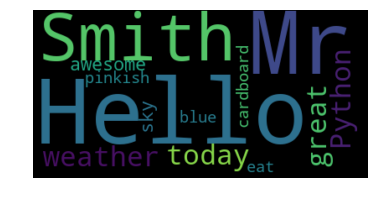

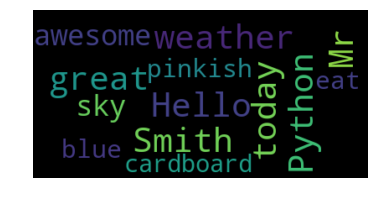

In [4]:
from os import path
from wordcloud import WordCloud

# Read the whole text.
#d = path.dirname(__file__)
#text = open(path.join(d, 'constitution.txt')).read()

# Generate a word cloud image
wordcloud = WordCloud().generate(EXAMPLE_TEXT)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(EXAMPLE_TEXT)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## spaCy
spaCy is a free open-source library featuring state-of-the-art speed and accuracy and a powerful Python API.  
*spaCy excels at large-scale information extraction tasks. It's written from the ground up in carefully memory-managed Cython. Independent research has confirmed that spaCy is the fastest in the world. If your application needs to process entire web dumps, spaCy is the library you want to be using.*

In [5]:
import spacy
nlp = spacy.load('en')
#below we link the python package to the pre-loaded model, it will return:
# Warning: no model found for 'en'

We need to link the prepared language model to spaCy. Detailed instructions about spaCy pre-trained model and how to use them can be found here, https://spacy.io/docs/usage/models.  
This is a Wode.AI specific step, which you may not need in other places.

In [6]:
!python -m spacy link /home/wode-user/shared/modelzoo/spaCy/en_core_web_md-1.2.1/en_core_web_md/en_core_web_md-1.2.1/ en --force


    Linking successful

    /home/wode-user/shared/modelzoo/spaCy/en_core_web_md-1.2.1/en_core_web_md/en_core_web_md-1.2.1
    --> /opt/conda/lib/python3.6/site-packages/spacy/data/en

    You can now load the model via spacy.load('en').



In [7]:
nlp = spacy.load('en')
doc = nlp(EXAMPLE_TEXT)
token = doc[0]
print(token)

# Print sentences (one sentence per line)
for sent in doc.sents:
    print(sent)

Hello
Hello Mr. Smith, how are you doing today?
The weather is great, and Python is awesome.
The sky is pinkish-blue.
You shouldn't eat cardboard.


To load the spaCy model, it takes a few seconds and also a large chunk of momery, which could affect you running the rest of this notebook.  
If you are interested in learing more spaCy, you will find [spaCy Notebooks](https://try.wode.ai/nlp/?repo=spacy-notebooks) pretty helpful.

Now we restart the kernel to release the large memory.
You can do that by clicking `Kernel` -> `restart`

## Stanford-CoreNLP + pycorenlp
`Stanford CoreNLP` ([link](https://stanfordnlp.github.io/CoreNLP/)) provides a set of human language technology tools. It can give the base forms of words, their parts of speech, whether they are names of companies, people, etc., normalize dates, times, and numeric quantities, mark up the structure of sentences in terms of phrases and syntactic dependencies, indicate which noun phrases refer to the same entities, indicate sentiment, extract particular or open-class relations between entity mentions, get the quotes people said, etc.

`pycorenlp` ([link](https://github.com/smilli/py-corenlp)) is a Python wrapper for Stanford CoreNLP. This simply wraps the API from the server included with CoreNLP 3.6.0. See the CoreNLP server [API documentation](http://stanfordnlp.github.io/CoreNLP/corenlp-server.html#api-documentation) for details.

In [1]:
# To run Stanford CoreNLP, the server has been started at first.
# Please go to terminal, and run the below command line
# cd '/home/wode-user/stanford-corenlp' && java -mx4g -cp "*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer

In [2]:
from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000')

In [3]:
text = (
  'Pusheen and Smitha walked along the beach. '
  'Pusheen wanted to surf, but fell off the surfboard.')
output = nlp.annotate(text, properties={
  'annotators': 'tokenize,ssplit,pos,depparse,parse',
  'outputFormat': 'json'
  })
print(output['sentences'][0]['parse'])

(ROOT
  (S
    (NP (NNP Pusheen)
      (CC and)
      (NNP Smitha))
    (VP (VBD walked)
      (PP (IN along)
        (NP (DT the) (NN beach))))
    (. .)))


In [4]:
nlp.tokensregex(text, pattern='/Pusheen|Smitha/', filter=False)

{'sentences': [{'0': {'begin': 0, 'end': 1, 'text': 'Pusheen'},
   '1': {'begin': 2, 'end': 3, 'text': 'Smitha'},
   'length': 2},
  {'0': {'begin': 0, 'end': 1, 'text': 'Pusheen'}, 'length': 1}]}

You can go back to the terminal, see the output of CoreNLP. It could be helpful during developement and testing.  
Now press `control+C` to shutdown the CoreNLP server.

# Enjoy it 

This comes the end of this notebook. Have fun playing with these cool tools, and build something awesome!